[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1JNjQz20SRnyRyAN9YtgCzYq4gj8iBTRH?usp=chrome_ntp#scrollTo=UtLn9rOF-gPm)

#Educhain 🎓🔗
Educhain is a powerful Python package that leverages Generative AI to create engaging and personalized educational content. From generating multiple-choice questions to crafting comprehensive lesson plans, Educhain makes it easy to apply AI in various educational scenarios.

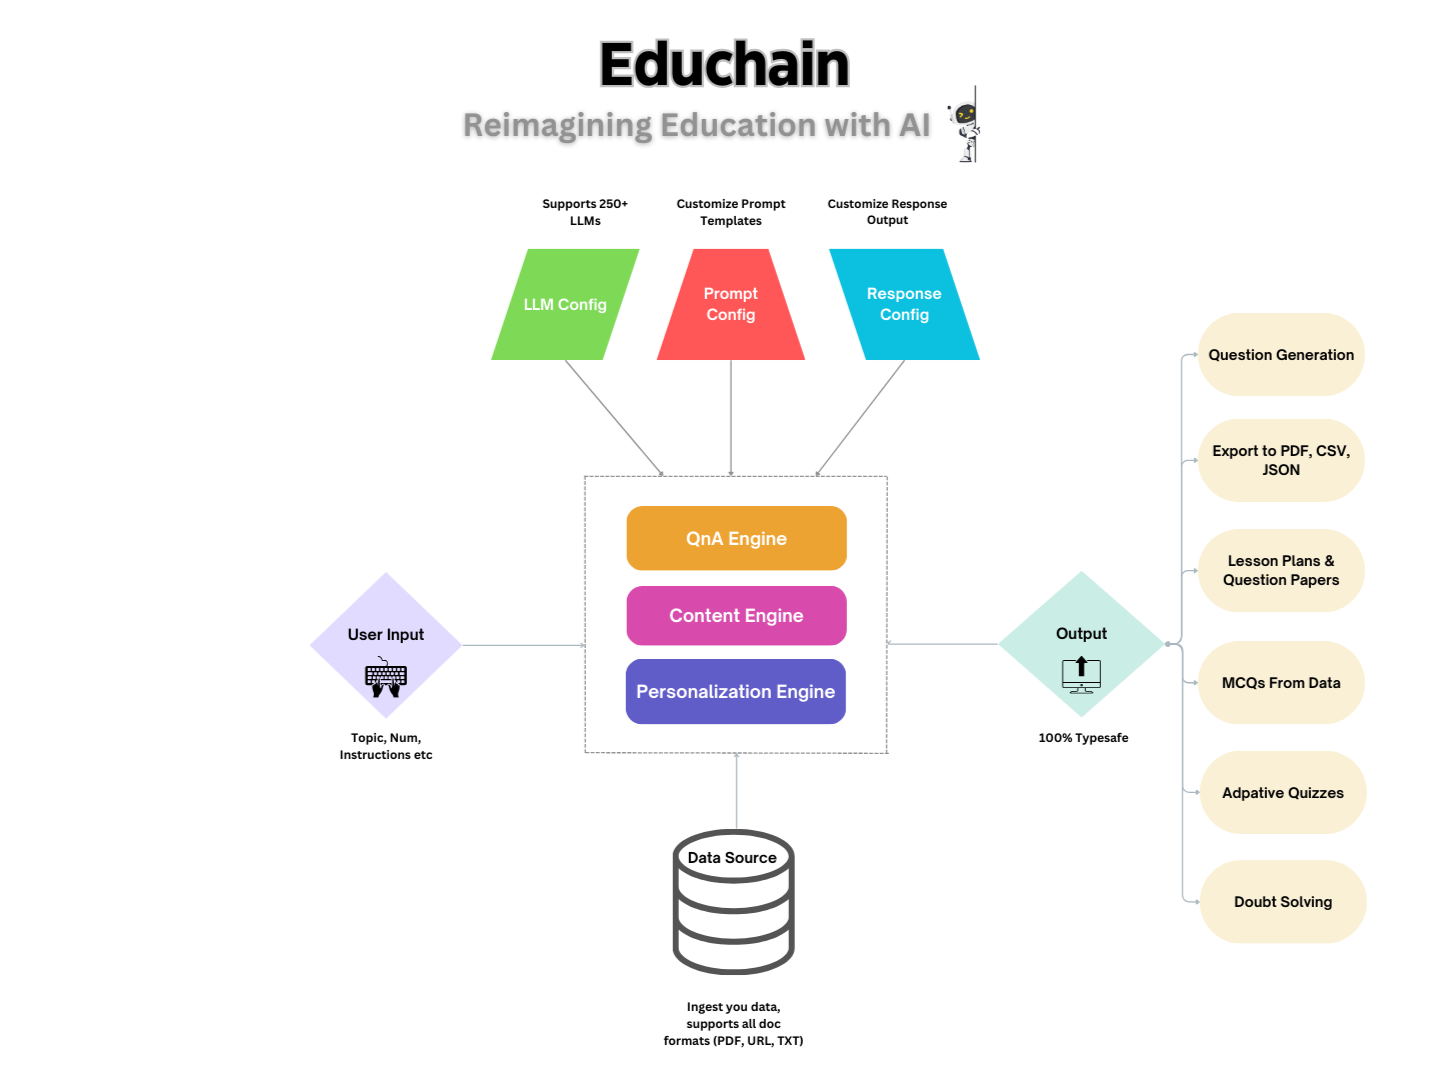

In [3]:
! pip install git+https://github.com/Shubhwithai/educhain.git

  Cloning https://github.com/Shubhwithai/educhain.git to /private/var/folders/j2/5k7518y170q1wlfrqlw1vb240000gn/T/pip-req-build-39r77gvz
  Running command git clone --filter=blob:none --quiet https://github.com/Shubhwithai/educhain.git /private/var/folders/j2/5k7518y170q1wlfrqlw1vb240000gn/T/pip-req-build-39r77gvz
  on a case-insensitive filesystem) and only one from the same
  colliding group is in the working tree:

    'cookbook/starters/Educhain_Starter_Guide_V3.ipynb'
    'cookbook/starters/educhain_Starter_guide_v3.ipynb'
  Resolved https://github.com/Shubhwithai/educhain.git to commit 66b4c82f4f3afda6d9a711a58810cab5aa7495eb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached langchain-0.3.19-py3-none-any.whl.metadata (7.9 kB)
  Using cached langchain_community-0.3.18-py3-none-any.whl.metadata (2.4 kB)
  Using cached langchain_openai-0.3.7-py3-none-any.whl.metadata (2.3 kB)
  Using 

In [9]:
!pip install -qU educhain

  error: subprocess-exited-with-error
  
  × Building wheel for matplotlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1069 lines of output]
      
      Edit mplsetup.cfg to change the build options; suppress output with --quiet.
      
      BUILDING MATPLOTLIB
            python: yes [3.13.2 (main, Feb  4 2025, 14:51:09) [Clang 16.0.0
                        (clang-1600.0.26.6)]]
          platform: yes [darwin]
             tests: no  [skipping due to configuration]
            macosx: yes [installing]
      
      WARNING setuptools_scm.pyproject_reading toml section missing 'pyproject.toml does not contain a tool.setuptools_scm section'
      Traceback (most recent call last):
        File "/private/var/folders/j2/5k7518y170q1wlfrqlw1vb240000gn/T/pip-build-env-ytapf7ob/overlay/lib/python3.13/site-packages/setuptools_scm/_integration/pyproject_reading.py", line 36, in read_pyproject
          section = defn.get("tool", {})[tool_name]
                    ~~~~

##Set up your API Key
Default is set to OPENAI

In [10]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')
# os.environ["ANTHROPIC_API_KEY"] = os.getenv("ANTHROPIC_API_KEY")

## Quickstart

Create MCQs just by entering the topic

In [11]:
from educhain import Educhain

client = Educhain()

ques = client.qna_engine.generate_questions(topic="Newton's Law of Motion",
                                            num=5)
print(ques)
ques.json()   #you can Generate Dictionaries with this ques.dict()

ModuleNotFoundError: No module named 'langchain_openai'

You can also pass level, number of questions and custom instructions as an input

In [8]:
from educhain import Educhain

client = Educhain()

result = client.qna_engine.generate_questions(
    topic="Indian History",
    level="Intermediate",
    num=2,
    custom_instructions="Focus on Independence movements"
)

result.json()

ModuleNotFoundError: No module named 'langchain_openai'

In [5]:
result.show()

NameError: name 'result' is not defined

### Using Custom Prompt Templates

You can create your own prompt templates and customize it with various input fields

In [6]:
from educhain import Educhain

client = Educhain()

custom_template = """
Generate {num} multiple-choice question (MCQ) based on the given topic and level.
Provide the question, four answer options, and the correct answer.
Topic: {topic}
Learning Objective: {learning_objective}
Difficulty Level: {difficulty_level}
"""

ques = client.qna_engine.generate_questions(
    topic="Python Programming",
    num=5,
    learning_objective="Usage of Python classes",
    difficulty_level="Hard",
    prompt_template=custom_template,
)

print(ques)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
ques.show()

Question 1:
Question: What is the output of the following code? class A: def __init__(self): self.x = 5; class B(A): pass; b = B(); print(b.x)
Options:
  A. 5
  B. 0
  C. AttributeError
  D. None

Correct Answer: 5
Explanation: Class B inherits from class A, so it has access to the variable x initialized in class A's constructor.

Question 2:
Question: Which of the following statements about Python class methods is true?
Options:
  A. Static methods can modify class state.
  B. Class methods can access instance variables.
  C. Instance methods can be called without creating an instance.
  D. Class methods are defined using the @classmethod decorator.

Correct Answer: Class methods are defined using the @classmethod decorator.
Explanation: Class methods are defined using the @classmethod decorator and have access to the class itself, not instance variables.

Question 3:
Question: Given the following code, what will be the output? class Test: def __init__(self, value): self.value = value

### Using Custom Models

You can create a custom response output using Pydantic

In [ ]:
  # Custom Model
from typing import List, Dict, Any, Optional
from pydantic import BaseModel, Field, validator

class Optioncustom(BaseModel):
    text: str = Field(description="The text of the option.")
    correct: str = Field(description="Whether the option is correct or not. Either 'true' or 'false'")


class MCQcustom(BaseModel):
    question: str = Field(description="The quiz question")
    options: List[Optioncustom] = Field(description="The possible answers to the question. The list should contain 4 options.")
    explanation: str = Field(default=None, description="Explanation of the question")
    blooms_level: str = Field(default=None, description="The Bloom's taxonomy level of the question")
    difficulty_level: str = Field(default=None, description="The difficulty level of the question. Can be 'easy', 'medium' or 'hard' mapping to the difficulty rating")
    difficulty_rating: int = Field(ge=1, le=5, description="The difficulty rating of the question (1-3)")
    metadata: Dict[str, Any] = Field(default={}, description="Additional metadata for the question. Like topic, subtopic etc")

    @property
    def correct_answer(self):
        for option in self.options:
            if option.correct.lower() == 'true':
                return option.text
        return None

    def show(self):
        options_str = "\n".join(f"  {chr(65 + i)}. {option.text}" for i, option in enumerate(self.options))
        print(f"Question: {self.question}\nOptions:\n{options_str}")
        print(f"Correct Answer: {self.correct_answer}")
        print(f"Explanation: {self.explanation}")
        print(f"Bloom's Level: {self.blooms_level}")
        print(f"Difficulty Level: {self.difficulty_level}")
        print(f"Difficulty Rating: {self.difficulty_rating}")
        print(f"Metadata: {self.metadata}\n")


class MCQListcustom(BaseModel):
    questions: List[MCQcustom]

    def show(self):
        print("MCQs:\n")
        for i, mcq in enumerate(self.questions, start=1):
            print(f"Question {i}:")
            mcq.show()

In [ ]:
from educhain import Educhain

client = Educhain()

result = client.qna_engine.generate_questions(
    topic="Indian Geography",
    num=3,
    response_model = MCQListcustom
)

result

MCQListcustom(questions=[MCQcustom(question='What is the longest river in India?', options=[Optioncustom(text='Ganges', correct='true'), Optioncustom(text='Indus', correct='false'), Optioncustom(text='Brahmaputra', correct='false'), Optioncustom(text='Godavari', correct='false')], explanation='The Ganges is the longest river in India, flowing over 2,500 kilometers.', blooms_level='Remember', difficulty_level='easy', difficulty_rating=1, metadata={'topic': 'Indian Geography', 'subtopic': 'Rivers'}), MCQcustom(question='Which mountain range separates India from Tibet?', options=[Optioncustom(text='Western Ghats', correct='false'), Optioncustom(text='Himalayas', correct='true'), Optioncustom(text='Aravalli Range', correct='false'), Optioncustom(text='Vindhya Range', correct='false')], explanation='The Himalayas form the natural barrier between India and Tibet.', blooms_level='Understand', difficulty_level='medium', difficulty_rating=2, metadata={'topic': 'Indian Geography', 'subtopic': 'M

In [ ]:
result.show()

MCQs:

Question 1:
Question: What is the longest river in India?
Options:
  A. Ganges
  B. Indus
  C. Brahmaputra
  D. Godavari
Correct Answer: Ganges
Explanation: The Ganges is the longest river in India, flowing over 2,500 kilometers.
Bloom's Level: Remember
Difficulty Level: easy
Difficulty Rating: 1
Metadata: {'topic': 'Indian Geography', 'subtopic': 'Rivers'}

Question 2:
Question: Which mountain range separates India from Tibet?
Options:
  A. Western Ghats
  B. Himalayas
  C. Aravalli Range
  D. Vindhya Range
Correct Answer: Himalayas
Explanation: The Himalayas form the natural barrier between India and Tibet.
Bloom's Level: Understand
Difficulty Level: medium
Difficulty Rating: 2
Metadata: {'topic': 'Indian Geography', 'subtopic': 'Mountain Ranges'}

Question 3:
Question: Which is the largest state in India by area?
Options:
  A. Madhya Pradesh
  B. Uttar Pradesh
  C. Rajasthan
  D. Maharashtra
Correct Answer: Madhya Pradesh
Explanation: Rajasthan is the largest state in India b

###Using Custom Response Models with Custom Prompts

In [ ]:
from educhain import Educhain

client = Educhain()

custom_template = """
Generate {num} multiple-choice question (MCQ) based on the given topic and level.
Provide the question, four answer options, and the correct answer.

Topic: {topic}
Difficulty Level: {difficulty_level}
Learning Objective: {learning_objective}
"""

result = client.qna_engine.generate_questions(
    topic="Python Programming",
    num=2,
    difficulty_level = "Very hard",
    learning_objective = "Python classes",
    prompt_template=custom_template,
    response_model = MCQListcustom
)

result

MCQListcustom(questions=[MCQcustom(question='What will be the output of the following code?\n\n```python\nclass A:\n    def __init__(self):\n        self.x = 10\n    def add(self, y):\n        return self.x + y\n\nclass B(A):\n    def __init__(self):\n        super().__init__()\n        self.x = 20\n\nb = B()\nprint(b.add(5))\n```', options=[Optioncustom(text='15', correct='false'), Optioncustom(text='20', correct='false'), Optioncustom(text='25', correct='true'), Optioncustom(text='30', correct='false')], explanation='The output is 25 because the `add` method of class A is called, which adds the instance variable `self.x` from class B (which is 20) to the argument passed (5).', blooms_level='Apply', difficulty_level='hard', difficulty_rating=3, metadata={'topic': 'Python Classes', 'subtopic': 'Inheritance'}), MCQcustom(question='Consider the following code snippet:\n\n```python\nclass Base:\n    def __init__(self):\n        self.value = 1\n    def show(self):\n        return self.valu

In [ ]:
result.show()

MCQs:

Question 1:
Question: What will be the output of the following code?

```python
class A:
    def __init__(self):
        self.x = 10
    def add(self, y):
        return self.x + y

class B(A):
    def __init__(self):
        super().__init__()
        self.x = 20

b = B()
print(b.add(5))
```
Options:
  A. 15
  B. 20
  C. 25
  D. 30
Correct Answer: 25
Explanation: The output is 25 because the `add` method of class A is called, which adds the instance variable `self.x` from class B (which is 20) to the argument passed (5).
Bloom's Level: Apply
Difficulty Level: hard
Difficulty Rating: 3
Metadata: {'topic': 'Python Classes', 'subtopic': 'Inheritance'}

Question 2:
Question: Consider the following code snippet:

```python
class Base:
    def __init__(self):
        self.value = 1
    def show(self):
        return self.value

class Derived(Base):
    def __init__(self):
        super().__init__()
        self.value = 2

obj = Derived()
print(obj.show())
``` 
What will be printed wh

## Using Different LLMs

Switch from OpenAI to any other LLM using Custum LLM Config

In [ ]:
!pip install -qU langchain-google-genai langchain-anthropic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.4/198.4 kB 7.3 MB/s eta 0:00:00


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from educhain import Educhain, LLMConfig
from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic
from google.colab import userdata


gemini_flash = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash-exp-0827",
    google_api_key=userdata.get("GOOGLE_API_KEY")
    )


llama3_groq = ChatOpenAI(
    model="llama-3.1-70b-versatile",
    openai_api_base="https://api.groq.com/openai/v1",
    openai_api_key=userdata.get("GROQ_API_KEY")
)


claude = ChatAnthropic(model='claude-3-5-sonnet-20240620')

###Generate Questions Using Llama3.1 Model

In [ ]:
from educhain import Educhain

llama3_config = LLMConfig(custom_model=llama3_groq)

client = Educhain(llama3_config)

ques = client.qna_engine.generate_questions(topic = "Indian Geography",
                                            num = 5,
                                            custom_instructions = "Focus on South India"
                                            )

ques.json()

'{"questions":[{"question":"Which of the following rivers flows through the state of Tamil Nadu?","answer":"Kaveri","explanation":"The Kaveri River is one of the major rivers in southern India and is the longest river in the state of Tamil Nadu.","options":["Kaveri","Godavari","Krishna","Tapti"]},{"question":"Which mountain range runs along the western edge of the Deccan Plateau in the states of Kerala and Tamil Nadu?","answer":"Western Ghats","explanation":"The Western Ghats mountain range is a UNESCO World Heritage Site and is home to several national parks and wildlife sanctuaries.","options":["Western Ghats","Eastern Ghats","Vindhya Range","Satpura Range"]},{"question":"Which city is the capital of the state of Andhra Pradesh?","answer":"Amaravati","explanation":"Amaravati is the de facto capital of the state of Andhra Pradesh and is located on the banks of the Krishna River.","options":["Amaravati","Hyderabad","Visakhapatnam","Vijayawada"]},{"question":"Which of the following stat

In [ ]:
ques.show()

Question 1:
Question: Which of the following rivers flows through the state of Tamil Nadu?
Options:
  A. Kaveri
  B. Godavari
  C. Krishna
  D. Tapti

Correct Answer: Kaveri
Explanation: The Kaveri River is one of the major rivers in southern India and is the longest river in the state of Tamil Nadu.

Question 2:
Question: Which mountain range runs along the western edge of the Deccan Plateau in the states of Kerala and Tamil Nadu?
Options:
  A. Western Ghats
  B. Eastern Ghats
  C. Vindhya Range
  D. Satpura Range

Correct Answer: Western Ghats
Explanation: The Western Ghats mountain range is a UNESCO World Heritage Site and is home to several national parks and wildlife sanctuaries.

Question 3:
Question: Which city is the capital of the state of Andhra Pradesh?
Options:
  A. Amaravati
  B. Hyderabad
  C. Visakhapatnam
  D. Vijayawada

Correct Answer: Amaravati
Explanation: Amaravati is the de facto capital of the state of Andhra Pradesh and is located on the banks of the Krishna Riv

###Generate Questions Using Gemini-1.5-Flash Model

In [ ]:
from educhain import Educhain

Gemini_config = LLMConfig(custom_model=gemini_flash)

client = Educhain(Gemini_config)

ques = client.qna_engine.generate_questions(topic = "Data Science",
                                            num = 5,
                                            custom_instructions = "Focus on Statistics"
                                            )

ques.json()

'{"questions":[{"question":"Which measure of central tendency is most sensitive to outliers?","answer":"Mean","explanation":"The mean is calculated by summing all values and dividing by the number of values. Outliers, being extreme values, can significantly impact this sum, thus making the mean sensitive to them.","options":["Mean","Median","Mode","Range"]},{"question":"What does the standard deviation measure?","answer":"The spread or dispersion of data around the mean","explanation":"Standard deviation quantifies how much individual data points deviate from the average (mean). A higher standard deviation indicates greater variability in the data.","options":["The spread or dispersion of data around the mean","The middle value in a dataset","The most frequent value in a dataset","The difference between the highest and lowest values"]},{"question":"Which statistical test is used to compare the means of two independent groups?","answer":"Independent samples t-test","explanation":"The in

In [ ]:
ques.show()

Question 1:
Question: Which measure of central tendency is most sensitive to outliers?
Options:
  A. Mean
  B. Median
  C. Mode
  D. Range

Correct Answer: Mean
Explanation: The mean is calculated by summing all values and dividing by the number of values. Outliers, being extreme values, can significantly impact this sum, thus making the mean sensitive to them.

Question 2:
Question: What does the standard deviation measure?
Options:
  A. The spread or dispersion of data around the mean
  B. The middle value in a dataset
  C. The most frequent value in a dataset
  D. The difference between the highest and lowest values

Correct Answer: The spread or dispersion of data around the mean
Explanation: Standard deviation quantifies how much individual data points deviate from the average (mean). A higher standard deviation indicates greater variability in the data.

Question 3:
Question: Which statistical test is used to compare the means of two independent groups?
Options:
  A. Independent 

###Generate Questions Using Claude-3.5-sonnet Model

In [ ]:
from educhain import Educhain

Claude_config = LLMConfig(custom_model=claude)

client = Educhain(Claude_config)

ques = client.qna_engine.generate_questions(topic = "Artifical Intelligence",
                                            num = 5,
                                            custom_instructions = "Focus on Large Language Models"
                                            )

ques.json()

'{"questions":[{"question":"What is the primary purpose of a Large Language Model (LLM)?","answer":"To generate human-like text based on input prompts","explanation":"LLMs are designed to understand and generate human-like text across a wide range of topics and tasks, making them versatile tools for various applications in natural language processing.","options":["To generate human-like text based on input prompts","To perform mathematical calculations","To create visual art","To control robotic systems"]},{"question":"Which of the following is NOT a common application of Large Language Models?","answer":"Real-time video processing","explanation":"While LLMs are versatile, they are primarily designed for text-based tasks. Real-time video processing is typically handled by other types of AI models specialized in computer vision.","options":["Chatbots and virtual assistants","Text summarization","Language translation","Real-time video processing"]},{"question":"What technique is commonly

In [ ]:
ques.show()

Question 1:
Question: What is the primary purpose of a Large Language Model (LLM)?
Options:
  A. To generate human-like text based on input prompts
  B. To perform mathematical calculations
  C. To create visual art
  D. To control robotic systems

Correct Answer: To generate human-like text based on input prompts
Explanation: LLMs are designed to understand and generate human-like text across a wide range of topics and tasks, making them versatile tools for various applications in natural language processing.

Question 2:
Question: Which of the following is NOT a common application of Large Language Models?
Options:
  A. Chatbots and virtual assistants
  B. Text summarization
  C. Language translation
  D. Real-time video processing

Correct Answer: Real-time video processing
Explanation: While LLMs are versatile, they are primarily designed for text-based tasks. Real-time video processing is typically handled by other types of AI models specialized in computer vision.

Question 3:
Qu

## Generate questions from data sources 📚

###URL Support

In [ ]:
from educhain import Educhain

client = Educhain()

url_list = client.qna_engine.generate_questions_from_data(
    source="https://www.buildfastwithai.com/genai-course",
    source_type="url",
    num=10,
    question_type="Multiple Choice",
    difficulty_level="Intermediate",
    custom_instructions= "Ask questions only about Satvik"

)

url_list.show()

Question 1:
Question: What is Satvik's educational background?
Options:
  A. Bachelor's and Master's degrees from IIT Delhi
  B. PhD from MIT
  C. Bachelor's degree from Harvard
  D. Master's degree from Stanford

Correct Answer: Bachelor's and Master's degrees from IIT Delhi
Explanation: Satvik is an alumnus of IIT Delhi, indicating a strong foundation in technical education.

Question 2:
Question: How many students has Satvik trained?
Options:
  A. Over 500 people
  B. Over 1000 people
  C. Over 5000 people
  D. Over 10000 people

Correct Answer: Over 5000 people
Explanation: Satvik has extensive experience in teaching and mentoring, having trained a large number of students.

Question 3:
Question: What role does Satvik hold in the Build Fast with AI bootcamp?
Options:
  A. Instructor
  B. Founder
  C. Mentor
  D. Project Manager

Correct Answer: Founder
Explanation: Satvik is the founder of the Build Fast with AI initiative, leading the bootcamp and its curriculum.

Question 4:
Ques

###PDF Support
Please include the file path of your PDF document.


In [ ]:
client = Educhain()


pdf_questions = client.qna_engine.generate_questions_from_data(
    source="/content/NIPS-2017-attention-is-all-you-need-Paper.pdf",
    source_type="pdf",
    num=10,
    question_type="Multiple Choice",
    learning_objective="",
    difficulty_level="Intermediate",
    custom_instructions= "what is this pdf about"
)

pdf_questions.show()

###TEXT Support

In [ ]:
from educhain import Educhain

client = Educhain()

text_questions = client.qna_engine.generate_questions_from_data(
    source="""Navigate the AI Landscape
            After Week 1, you'll possess a deep understanding of LLMs, Transformers, and Prompt Engineering, enabling you to guide AI initiatives with confidence.""",
    source_type="text",
    num=10,
    question_type="Multiple Choice",
    learning_objective="",
    difficulty_level="Intermediate",
    custom_instructions= "Focus on LLMS"
)

text_questions.show()

Question 1:
Question: What does LLM stand for in the context of AI?
Options:
  A. Large Language Model
  B. Low-Level Model
  C. Linear Learning Model
  D. Linguistic Language Model

Correct Answer: Large Language Model
Explanation: LLM refers to Large Language Models, which are designed to understand and generate human language.

Question 2:
Question: Which architecture is commonly used in LLMs?
Options:
  A. Convolutional Neural Networks
  B. Recurrent Neural Networks
  C. Transformers
  D. Decision Trees

Correct Answer: Transformers
Explanation: Transformers are the backbone architecture for most modern LLMs, enabling better context understanding and generation.

Question 3:
Question: What is prompt engineering?
Options:
  A. Creating AI models from scratch
  B. Crafting inputs to elicit desired responses from AI models.
  C. Training models using reinforcement learning
  D. Collecting data for AI training

Correct Answer: Crafting inputs to elicit desired responses from AI models.

## Generate Questions with question types ⁉



✅ Multiple Choice

✅Fill in the blanks

✅ Short Answer

✅ True/False Questions

###✅ Multiple Choice


In [ ]:
from educhain import Educhain

client = Educhain()

questions = client.qna_engine.generate_questions(
    topic="Machine Learning",
    num=10,
    question_type="Multiple Choice",) # #supported types : "Multiple Choice", "Short Answer", "True/False", "Fill in the Blank"

questions.show()

Question 1:
Question: What is the primary goal of supervised learning in machine learning?
Options:
  A. To cluster data points into groups.
  B. To learn a mapping from inputs to outputs using labeled data.
  C. To generate new data points.
  D. To find hidden patterns in unlabeled data.

Correct Answer: To learn a mapping from inputs to outputs using labeled data.
Explanation: Supervised learning relies on labeled datasets to train models that can predict outcomes for new, unseen data.

Question 2:
Question: Which of the following is NOT a common type of machine learning?
Options:
  A. Supervised Learning
  B. Unsupervised Learning
  C. Reinforcement Learning
  D. Random Learning

Correct Answer: Random Learning
Explanation: The major types of machine learning include supervised learning, unsupervised learning, and reinforcement learning; 'Random Learning' is not a recognized type.

Question 3:
Question: What is overfitting in machine learning?
Options:
  A. When a model learns the t

###✅Fill in the blanks


In [ ]:
from educhain import Educhain

client = Educhain()

questions = client.qna_engine.generate_questions(
    topic="Gravitation",
    num=10,
    question_type="Fill in the Blank",) # #supported types : "Multiple Choice", "Short Answer", "True/False", "Fill in the Blank"

questions.show()

Question 1:
Question: The force of attraction between two masses is called __________.
Answer: gravitation
Explanation: Gravitation is the natural phenomenon by which all things with mass are brought toward one another.

Word to fill: gravitation

Question 2:
Question: According to Newton's law of universal gravitation, the gravitational force is directly proportional to the product of the masses and inversely proportional to the square of the __________ between them.
Answer: distance
Explanation: This relationship means that as the distance between two masses increases, the gravitational force decreases.

Word to fill: distance

Question 3:
Question: The gravitational pull of the Earth gives us our weight, which is measured in __________.
Answer: newtons
Explanation: Weight is the force exerted by gravity on an object, and it is measured in newtons (N).

Word to fill: newtons

Question 4:
Question: The acceleration due to gravity on the surface of the Earth is approximately __________

###✅ Short Answer



In [ ]:
from educhain import Educhain

client = Educhain()

questions = client.qna_engine.generate_questions(
    topic="Atoms",
    num=10,
    question_type="Short Answer",
   difficulty_level="Intermediate", ) # #supported types : "Multiple Choice", "Short Answer", "True/False", "Fill in the Blank"

questions.show()

Question 1:
Question: What is the basic unit of matter?
Answer: Atom
Explanation: Atoms are the smallest units of matter that retain the properties of an element.

Keywords: atom, matter, element

Question 2:
Question: What are the three main subatomic particles found in an atom?
Answer: Protons, neutrons, and electrons
Explanation: Protons and neutrons are found in the nucleus, while electrons orbit around the nucleus.

Keywords: subatomic particles, protons, neutrons, electrons

Question 3:
Question: What is the charge of a proton?
Answer: Positive
Explanation: Protons carry a positive electric charge, which is essential for the structure of atoms.

Keywords: proton, charge, positive

Question 4:
Question: What is the charge of an electron?
Answer: Negative
Explanation: Electrons have a negative charge, which balances the positive charge of protons in an atom.

Keywords: electron, charge, negative

Question 5:
Question: Where are neutrons located in an atom?
Answer: In the nucleus
Ex

###✅ True/False Questions



In [ ]:
from educhain import Educhain

client = Educhain()

questions = client.qna_engine.generate_questions(
    topic="quntum Computing",
    num=10,
    question_type="True/False",
   difficulty_level="Intermediate", ) # #supported types : "Multiple Choice", "Short Answer", "True/False", "Fill in the Blank"

questions.show()

Question 1:
Question: Quantum computers use classical bits for processing.
Answer: False
Explanation: Quantum computers use qubits, which can exist in multiple states simultaneously, unlike classical bits which are either 0 or 1.

True/False: False

Question 2:
Question: Entanglement is a phenomenon where qubits become linked in such a way that the state of one directly affects the state of another, regardless of distance.
Answer: True
Explanation: Entanglement is a key feature of quantum mechanics that allows qubits to be interconnected in a unique way.

True/False: True

Question 3:
Question: Shor's algorithm is designed for efficiently solving problems that can be solved in polynomial time on classical computers.
Answer: False
Explanation: Shor's algorithm is specifically designed to factor large numbers exponentially faster than the best-known classical algorithms.

True/False: False

Question 4:
Question: Quantum superposition allows a qubit to be in a state of 0, 1, or both at th

###Generate Lesson Plans


In [ ]:
from educhain import Educhain

client = Educhain()

plan = client.content_engine.generate_lesson_plan(
                              topic = "Arithmetic")

print(plan)
plan.json()  # plan.dict()

In [ ]:
plan.show()

Lesson Plan: Exploring Newton's Laws of Motion
Subject: Physics

1. Newton's First Law of Motion

   1.1 Inertia
      - Inertia is the tendency of an object to resist changes in its state of motion.
      - A book resting on a table will remain at rest until someone pushes it.
      - Conduct an experiment using a toy car and observe how it continues to move until friction slows it down.

   1.2 Balanced and Unbalanced Forces
      - Balanced forces do not change an object's motion, while unbalanced forces do.
      - When two people push a stationary car with equal force in opposite directions, the forces are balanced.
      - Use a force meter to measure forces on an object and determine if they are balanced or unbalanced.

2. Newton's Second Law of Motion

   2.1 Force, Mass, and Acceleration
      - Newton's Second Law states that Force equals Mass times Acceleration (F=ma).
      - If you push a car and a bicycle with the same force, the bicycle will accelerate more because it ha

##Generate Questions With RAG

###URL Support

In [ ]:
from educhain import Educhain

client = Educhain()

url_list = client.qna_engine.generate_questions_with_rag(
    source="https://www.buildfastwithai.com/genai-course",
    source_type="url",
    num=20,
    question_type="Multiple Choice",
    difficulty_level="Intermediate",
    custom_instructions= "Ask questions only about Satvik"

)

url_list.show()

Question 1:
Question: What is the start date of the Generative AI Bootcamp?
Options:
  A. 1st November
  B. 5th November
  C. 9th November
  D. 15th November

Correct Answer: 9th November

Question 2:
Question: How long is the Generative AI Bootcamp program?
Options:
  A. 4 weeks
  B. 6 weeks
  C. 8 weeks
  D. 10 weeks

Correct Answer: 6 weeks

Question 3:
Question: Who is the instructor of the Generative AI Bootcamp?
Options:
  A. John Doe
  B. Satvik
  C. Alice Smith
  D. Michael Brown

Correct Answer: Satvik

Question 4:
Question: What is the fee for the Generative AI Bootcamp?
Options:
  A. Rs 20,000/-
  B. Rs 25,000/-
  C. Rs 30,000/-
  D. Rs 35,000/-

Correct Answer: Rs 30,000/-

Question 5:
Question: How often are the live sessions scheduled during the bootcamp?
Options:
  A. Every Monday
  B. Every Wednesday
  C. Every Saturday
  D. Every Sunday

Correct Answer: Every Saturday

Question 6:
Question: What is included in the fee for the bootcamp?
Options:
  A. $100 in AI Credits


###PDF Support

In [ ]:
from educhain import Educhain

client = Educhain()


pdf_questions = client.qna_engine.generate_questions_with_rag(
    source="/content/2304.10557v5.pdf",
    source_type="pdf",
    num=20,
    question_type="Multiple Choice",
    learning_objective="",
    difficulty_level="Intermediate",
    custom_instructions= "what is this pdf about"
)

pdf_questions.show()

Question 1:
Question: What is the primary purpose of a transformer in machine learning?
Options:
  A. To learn useful representations of sequences or sets of data-points.
  B. To perform image classification.
  C. To generate random data.
  D. To replace traditional algorithms.

Correct Answer: To learn useful representations of sequences or sets of data-points.

Question 2:
Question: Which area has the transformer NOT significantly advanced according to the document?
Options:
  A. Natural language processing.
  B. Computer vision.
  C. Spatio-temporal modelling.
  D. Image enhancement.

Correct Answer: Image enhancement.

Question 3:
Question: What type of mathematical descriptions does the document aim to provide for transformers?
Options:
  A. Mathematically precise and intuitive.
  B. Only practical examples.
  C. Only theoretical concepts.
  D. Mathematically complex and confusing.

Correct Answer: Mathematically precise and intuitive.

Question 4:
Question: What does the document

###TEXT Support

In [ ]:
from educhain import Educhain

client = Educhain()

text_questions = client.qna_engine.generate_questions_with_rag(
    source="""Navigate the AI Landscape
            After Week 1, you'll possess a deep understanding of LLMs, Transformers, and Prompt Engineering, enabling you to guide AI initiatives with confidence.""",
    source_type="text",
    num=10,
    question_type="Multiple Choice",
    learning_objective="",
    difficulty_level="Intermediate",
    custom_instructions= "Focus on LLMS"
)

text_questions.show()

Question 1:
Question: What does LLM stand for?
Options:
  A. Large Language Model
  B. Long Language Model
  C. Learning Language Model
  D. Linguistic Language Model

Correct Answer: Large Language Model

Question 2:
Question: Which of the following is a key component of Transformers?
Options:
  A. Recurrent Neural Networks
  B. Self-Attention Mechanism
  C. Convolutional Neural Networks
  D. Feedforward Networks

Correct Answer: Self-Attention Mechanism

Question 3:
Question: What is the primary purpose of Prompt Engineering?
Options:
  A. To code AI algorithms
  B. To create effective inputs for AI models
  C. To analyze AI performance
  D. To train AI models

Correct Answer: To create effective inputs for AI models

Question 4:
Question: What is the role of a Transformer in Natural Language Processing?
Options:
  A. To process sequential data efficiently
  B. To generate images from text
  C. To classify data into categories
  D. To encrypt messages

Correct Answer: To process sequ